# ARIMA-AutoRegressive Integrated Moving Average
https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

### What is ARIMA?

https://www.youtube.com/watch?v=QDrmpphIfLE

https://www.youtube.com/watch?v=4WWQWeMXvas

https://www.youtube.com/watch?v=0xHf-SJ9Z9U

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

#### The difference between Autoregression and linear regression

Gaussian process

https://www.youtube.com/watch?v=92-98SYOdlY

http://www.gaussianprocess.org/gpml/code/matlab/doc/


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


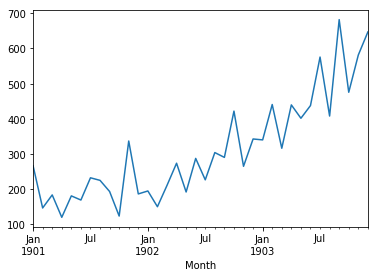

In [6]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('./input/shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

### What is Auto Correlation and Partial Auto Correlation?

https://www.youtube.com/watch?v=ZjaBn93YPWo

How to decide the number of lagged observations in an ARIMA model.

https://www.youtube.com/watch?v=Aft25mI1ffw

How to decide the order of differencing in an ARIMA model.

https://people.duke.edu/~rnau/411arim2.htm

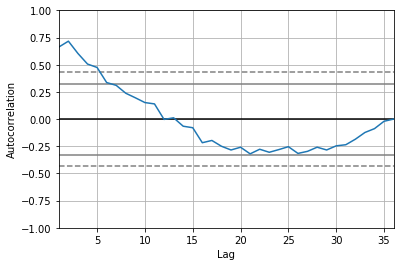

In [9]:
from pandas.plotting import autocorrelation_plot
 
 
series = read_csv('./input/shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
autocorrelation_plot(series)
pyplot.show()

Running the example, we can see that there is a positive correlation with the first 10-to-12 lags that is perhaps significant for the first 5 lags. It meas that lag 1-5 have correlations with eath other, so that we should make use of these data.


#### What is residual plot?
https://www.youtube.com/watch?v=iMdtTCX2Q70
https://www.youtube.com/watch?v=VamMrPZ-8fc
#### What is KDE?
https://www.youtube.com/watch?v=x5zLaWT5KPs

/Users/andrewtseng/anaconda3/envs/deeplearning/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/andrewtseng/anaconda3/envs/deeplearning/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/Users/andrewtseng/anaconda3/envs/deeplearning/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Wed, 19 Jun 2019   AIC                            406.340
Time:                        21:10:03   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

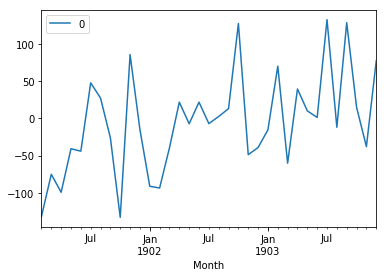

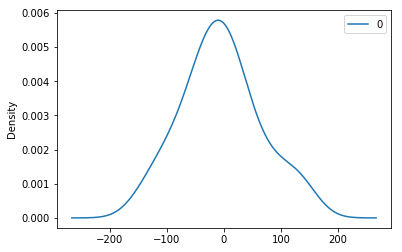

                0
count   35.000000
mean    -5.495218
std     68.132882
min   -133.296637
25%    -42.477890
50%     -7.186512
75%     24.748330
max    133.237936


In [11]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())


### Intepretation of the graphs

1. First, we get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model. This means that we have to improve the model until there is nearly no trend in the residual error.

2. we get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.

3. The distribution of the residual errors is displayed. The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals).

How to identify ARIMA p d and q parameters and fit the model in Python
https://www.youtube.com/watch?v=bqvZL8Ww3aA

## Next, letâ€™s look at how we can use the ARIMA model to make forecasts

https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

- In each iteration, we add the last step into the training history data and retrain a new model.
- The forecast() function performs a one-step forecast using the model, thus the prediction array would contain only one value.

predicted=349.117636, expected=342.300000
predicted=306.513010, expected=339.700000
predicted=387.376466, expected=440.400000
predicted=348.154255, expected=315.900000
predicted=386.308811, expected=439.300000
predicted=356.082028, expected=401.300000
predicted=446.379518, expected=437.400000
predicted=394.737242, expected=575.500000
predicted=434.915541, expected=407.600000
predicted=507.923456, expected=682.000000
predicted=435.482818, expected=475.300000
predicted=652.743768, expected=581.300000
predicted=546.343465, expected=646.900000
Test MSE: 6958.327


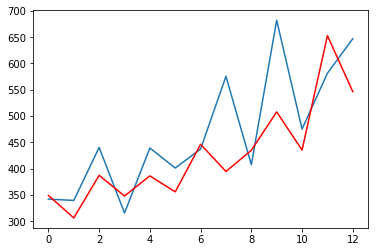

In [13]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('input/shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## How to Tune ARIMA Parameters in Python

https://machinelearningmastery.com/tune-arima-parameters-python/

https://www.youtube.com/watch?v=re6N30kBMes